In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CMR = pd.read_csv(r"https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=cf3bfcad6ccbca1e", encoding="utf-8", low_memory=False)

In [3]:
CMR.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [4]:
CMR = CMR.loc[CMR["country_region"] == "Poland"]

In [5]:
CMR["sub_region_1"].fillna("Polska", inplace=True)

In [6]:
CMR.drop(columns=["country_region_code", "sub_region_2", "iso_3166_2_code", "census_fips_code"], inplace=True)

In [7]:
SourceRegName = list(CMR["sub_region_1"].unique())

# From Google Translate
LocalRegName = ["Polska",
                "Województwo wielkopolskie",
                "Województwo kujawsko-pomorskie",
                "Województwo małopolskie",
                "Województwo łódzkie",
                "Województwo dolnośląskie",
                "Województwo lubelskie",
                "Województwo lubuskie",
                "Województwo mazowieckie",
                "Województwo opolskie",
                "Województwo podkarpackie",
                "Województwo podlaskie",
                "Województwo pomorskie",
                "Województwo śląskie",
                "Województwo świętokrzyskie",
                "Województwo warmińsko-mazurskie",
                "Województwo zachodniopomorskie"]

NewRegioName = {org: new.split(" ")[1].title() for org, new in zip(SourceRegName[1:], LocalRegName[1:])}

In [8]:
SourcePlaceName = CMR.columns.tolist()

NewNicePlaceName = ["Country",
                    "Region",
                    "Date",
                    "Retail & Recreation",
                    "Parks",
                    "Grocery & Pharmacy",
                    "Transit Stations",
                    "Workplaces",
                    "Residential"]

NewPlaceName = {org: new for org, new in zip(SourcePlaceName, NewNicePlaceName)}

In [9]:
CMR.rename(columns=NewPlaceName, inplace=True)

In [10]:
CMR["Region"].replace(NewRegioName, inplace=True)

In [11]:
CMR = CMR.pivot_table(index="Date", columns=["Country", "Region"])

In [13]:
CMR = CMR.droplevel("Country", axis="columns")

In [14]:
CMR = CMR.swaplevel(axis="columns").sort_index(axis=1, level=0)

In [16]:
CMR.head()

Region           Dolnośląskie                                        \
           Grocery & Pharmacy Parks Residential Retail & Recreation   
Date                                                                  
2020-02-15               35.0  -3.0        -3.0                 4.0   
2020-02-16               20.0 -23.0        -2.0                14.0   
2020-02-17               14.0  -2.0         1.0                 6.0   
2020-02-18               21.0  -4.0         2.0                 5.0   
2020-02-19                4.0  -4.0         2.0                 6.0   

Region                                 Kujawsko-Pomorskie                    \
           Transit Stations Workplaces Grocery & Pharmacy Parks Residential   
Date                                                                          
2020-02-15              7.0       -2.0               33.0  -1.0         0.0   
2020-02-16              8.0       -1.0              -10.0 -20.0         1.0   
2020-02-17             -9.0      -15.0               11.0   3.0        -2.0   
2020-02-18            -10.0      -15.0                2.0  -3.0         1.0   
2020-02-19            -10.0      -15.0               -2.0   0.0         1.0   

Region                          ...     Śląskie                      \
           Retail & Recreation  ... Residential Retail & Recreation   
Date                            ...                                   
2020-02-15                13.0  ...         0.0                13.0   
2020-02-16                 6.0  ...         1.0                21.0   
2020-02-17                 5.0  ...        -1.0                 9.0   
2020-02-18                 3.0  ...         0.0                 3.0   
2020-02-19                 4.0  ...         0.0                 5.0   

Region                                     Świętokrzyskie                    \
           Transit Stations Workplaces Grocery & Pharmacy Parks Residential   
Date                                                                          
2020-02-15             13.0        3.0               14.0   4.0         0.0   
2020-02-16             14.0       -1.0               37.0   9.0         1.0   
2020-02-17             11.0       21.0               17.0   8.0        -3.0   
2020-02-18              7.0        2.0               -1.0   3.0         1.0   
2020-02-19              4.0        1.0               26.0   9.0         0.0   

Region                                                      
           Retail & Recreation Transit Stations Workplaces  
Date                                                        
2020-02-15                13.0             14.0        0.0  
2020-02-16                14.0             18.0       -2.0  
2020-02-17                11.0             25.0       30.0  
2020-02-18                 8.0             15.0        3.0  
2020-02-19                10.0             15.0        3.0  

[5 rows x 102 columns]

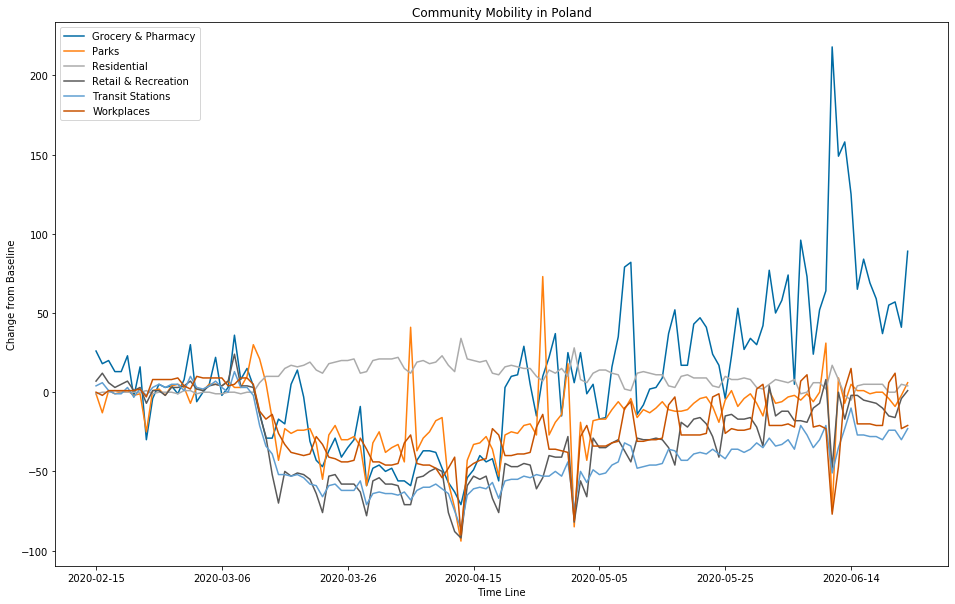

In [28]:
mpl.style.use(["tableau-colorblind10"])

CMR.loc[:, "Polska"].plot(figsize=(16, 10), fontsize=10)

plt.title("Community Mobility in Poland")
plt.ylabel("Change from Baseline")
plt.xlabel("Time Line")

plt.show()

In [29]:
Pl = CMR.loc[:, [('Polska', 'Retail & Recreation'), ('Polska', 'Parks'), ('Polska', 'Grocery & Pharmacy'), ('Polska', 'Transit Stations'), ('Polska', 'Workplaces')]]

In [30]:
PlTotal = pd.DataFrame(Pl.mean(axis=1))

In [31]:
PlTotal["idx"] = list(range(len(PlTotal)))

PlTotal.columns = ["Total", "Idx"]

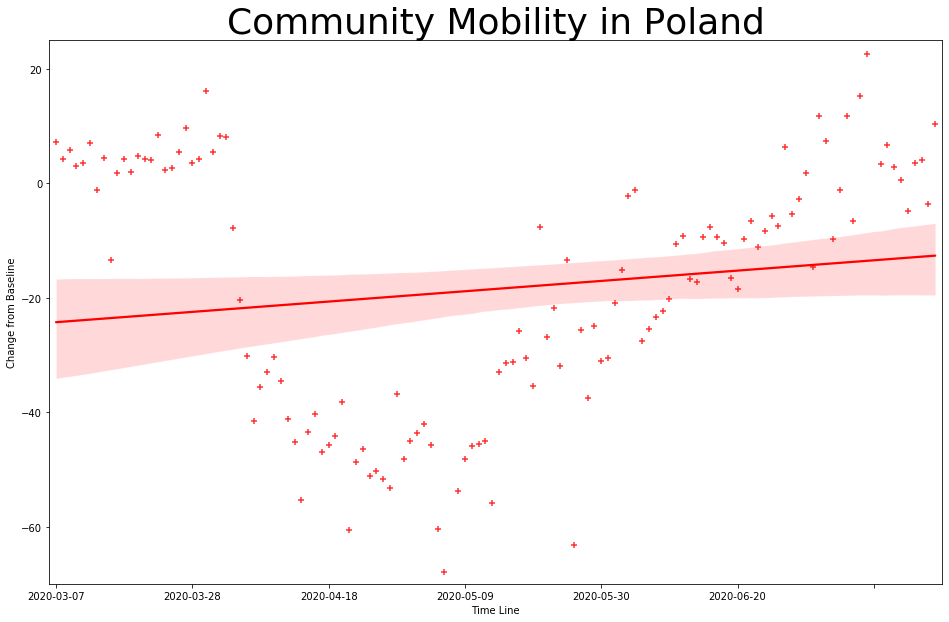

In [32]:
plt.figure(figsize=(16, 10))
plt.ylim(-70, 25)
plt.xlim(-1, 130)
sns.set(font_scale=3)

LRchart = sns.regplot(x="Idx", y="Total", data=PlTotal, color="red", marker="+", scatter_kws={'s': 40})
LRchart.set(xlabel="Time Line", ylabel="Change from Baseline", xticklabels=PlTotal.index[::21])
LRchart.set_title("Community Mobility in Poland")
plt.show()